# Van der Pol 振動子

* Author: 黒木玄
* Date: 2019-04-05～2019-04-15, 2021-07-14
* Repository: https://github.com/genkuroki/DifferentialEquations
$
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\eps{\varepsilon}
\newcommand\QED{\text{□}}
$

このファイルは [nbviewer](https://nbviewer.jupyter.org/github/genkuroki/DifferentialEquations/blob/master/01-1%20Van%20der%20Pol%20oscillator.ipynb) でも閲覧できる.

[Julia言語](https://julialang.org/) と [Jupyter環境](https://jupyter.org/) の簡単な解説については次を参照せよ:

* [JuliaとJupyterのすすめ](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/msfd28genkuroki.ipynb?flush_cached=true)

[Julia言語](https://julialang.org/) 環境の整備の仕方については次を参照せよ:

* [Julia v1.1.0 の Windows 8.1 へのインストール](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/install.ipynb)

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Van-der-Pol-振動子" data-toc-modified-id="Van-der-Pol-振動子-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Van der Pol 振動子</a></span></li><li><span><a href="#Van-der-Pol-方程式のベクトル場と流れの図" data-toc-modified-id="Van-der-Pol-方程式のベクトル場と流れの図-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Van der Pol 方程式のベクトル場と流れの図</a></span><ul class="toc-item"><li><span><a href="#$\mu-=-0$-の場合" data-toc-modified-id="$\mu-=-0$-の場合-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$\mu = 0$ の場合</a></span></li><li><span><a href="#$\mu$-が正の場合" data-toc-modified-id="$\mu$-が正の場合-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>$\mu$ が正の場合</a></span></li><li><span><a href="#$\mu$-が負の場合" data-toc-modified-id="$\mu$-が負の場合-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>$\mu$ が負の場合</a></span></li></ul></li><li><span><a href="#Van-der-Pol-方程式の数値解" data-toc-modified-id="Van-der-Pol-方程式の数値解-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Van der Pol 方程式の数値解</a></span><ul class="toc-item"><li><span><a href="#$\mu=0$" data-toc-modified-id="$\mu=0$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>$\mu=0$</a></span></li><li><span><a href="#$\mu-=-0.1$" data-toc-modified-id="$\mu-=-0.1$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>$\mu = 0.1$</a></span></li><li><span><a href="#$\mu=0.5$" data-toc-modified-id="$\mu=0.5$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>$\mu=0.5$</a></span></li><li><span><a href="#$\mu=1$" data-toc-modified-id="$\mu=1$-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>$\mu=1$</a></span></li></ul></li><li><span><a href="#正弦波による強制力付きの場合" data-toc-modified-id="正弦波による強制力付きの場合-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>正弦波による強制力付きの場合</a></span></li></ul></div>

In [1]:
using PyPlot: PyPlot, plt

In [2]:
function plot_stream(f, g;
        x = range(-4, 4, length=201),
        y = range(-4, 4, length=201),
        density = 1.2, figtitle="", sign=1.0)
    
    # meshgrid
    xx, yy = reim(complex.(x', y))
    XX = f.(xx, sign*yy)
    YY = g.(xx, sign*yy) * sign
    
    plt.streamplot(xx, yy, XX, YY, linewidth=0.5, density=density, color="blue")
    plt.xlim(extrema(x)...)
    plt.ylim(extrema(y)...)
    plt.grid(ls=":")
    figtitle == "" || plt.title(figtitle)
end

function plot_vector_field(f, g;
        x = range(-4, 4, length=21),
        y = range(-4, 4, length=21),
        figtitle="", scale=2.0, sign=1.0)
    
    # meshgrid
    xx, yy = reim(complex.(x', y))
    XX = f.(xx, sign*yy)
    YY = g.(xx, sign*yy) * sign
    MM = maximum(@.(√(XX^2+YY^2)))
    #println(MM) # for debug
    
    plt.quiver(xx, yy, XX, YY, scale=scale*MM, color="red")
    plt.xlim(extrema(x)...)
    plt.ylim(extrema(y)...)
    plt.grid(ls=":")
    figtitle == "" || plt.title(figtitle)
end

plot_vector_field (generic function with 1 method)

## Van der Pol 振動子

[**Van der Pol (ファン・デル・ポル) 振動子**](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) とは以下の非線形常微分方程式で記述される系のことである:

$$
\ddot{x} - \mu(1-x^2)\dot{x} + x = 0.
$$

ここで $x=x(t)$ の時刻 $t$ に関する1階と2階の導函数を $\dot{x}$, $\ddot{x}$ と表した.  この微分方程式を **Van der Pol 方程式** と呼ぶ.

## Van der Pol 方程式のベクトル場と流れの図

$v = \dot{x}$ とおくと, Van der Pol 方程式は次の連立常微分方程式に書き直される:

$$
\begin{cases}
\dot{x} = v, \\
\dot{v} = \mu(1-x^2)v - x.
\end{cases}
$$

この微分方程式は位置 $x$ と速度 $v$ を平面上の点 $(x,v)$ で表すとき, その点の動きの速度ベクトルが $(v, \mu(1-x^2)v-x)$ となることを意味している.  平面上の各点にその点における速度ベクトルを対応させる函数を平面上の **ベクトル場** と呼ぶ. 上の連立常微分方程式はベクトル場に沿って平面上の点が流れて行く様子を表している.

In [3]:
function plot_Van_der_Pol(μ; scale=1/√abs(μ), sign=1.0)
    # Van der Pol equation
    f(x,v) = v
    g(x,v) = μ*(1-x^2)*v - x

    plt.figure(figsize=(7,3.5))
    plt.subplot("121")
    plot_stream(f, g, figtitle="Van der Pol: μ = $μ", sign=sign)
    plt.subplot("122")
    plot_vector_field(f, g, figtitle="Van der Pol: μ = $μ", scale=scale, sign=sign)
    plt.tight_layout()
end

plot_Van_der_Pol (generic function with 1 method)

### $\mu = 0$ の場合

$\mu=0$ のとき, Van der Pol 方程式は

$$
\begin{cases}
\dot{x} = v, \\
\dot{v} = - x.
\end{cases}
$$

の形になる.  これが定める流れは時計回りで回転する流れになる. その一般解は, $r\geqq 0$ と実数 $a$ を使って次のように書ける:

$$
\begin{cases}
\dot{x} = r\sin(t-a), \\
\dot{v} = r\cos(t-a).
\end{cases}
$$

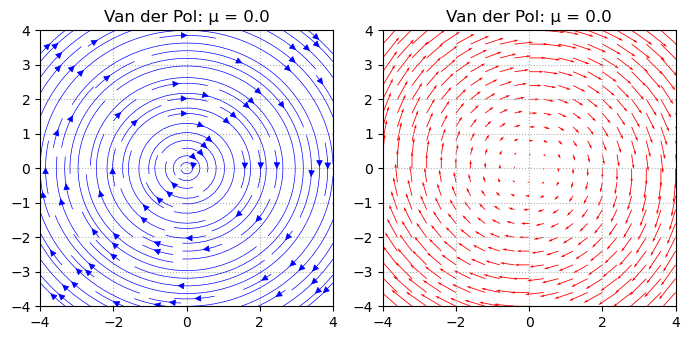

sys:1: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall D:\.julia\packages\PyCall\BD546\src\numpy.jl:67


In [4]:
plot_Van_der_Pol(0.0, scale=10.0)

### $\mu$ が正の場合

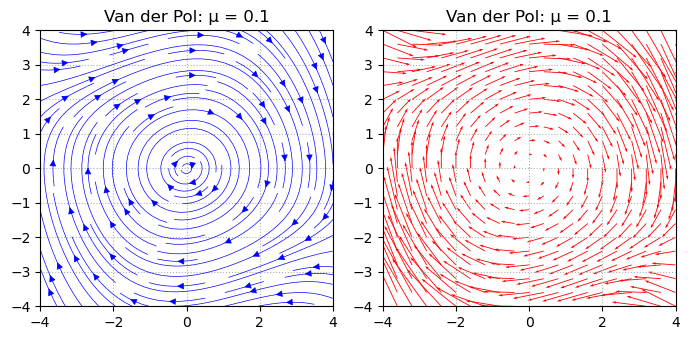

In [5]:
plot_Van_der_Pol(0.1)

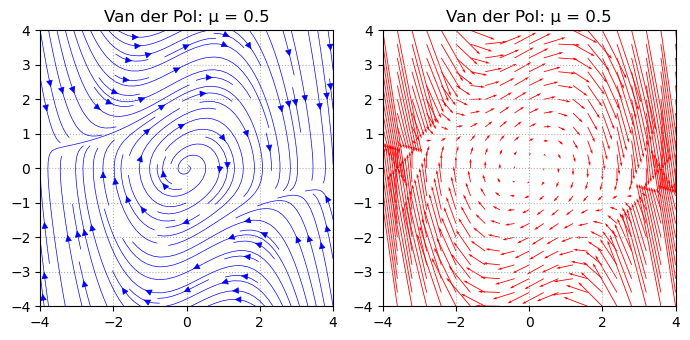

In [6]:
plot_Van_der_Pol(0.5)

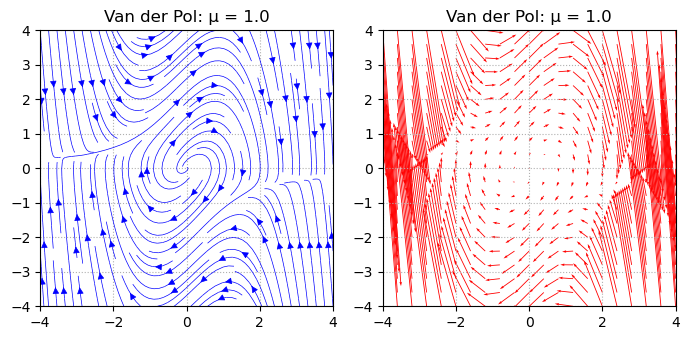

In [7]:
plot_Van_der_Pol(1.0)

### $\mu$ が負の場合

Van der Pol 方程式

$$
\ddot{x} - \mu(1-x^2)\dot{x} + x = 0.
$$

で時刻 $t$ が進む向きを逆転させると, すなわち, $t$ に $-t$ を代入すると, 

$$
\ddot{x} + \mu(1-x^2)\dot{x} + x = 0.
$$

の形になる. すなわち, 時間の向きを逆転させることと, パラメーター $\mu$ をその $-1$ 倍で置き換えることは等しい. 

以下の $\mu=0.2$ と $\mu=-0.2$ の場合のプロットを比較すると, 矢印の向きが逆になっていることがわかる.

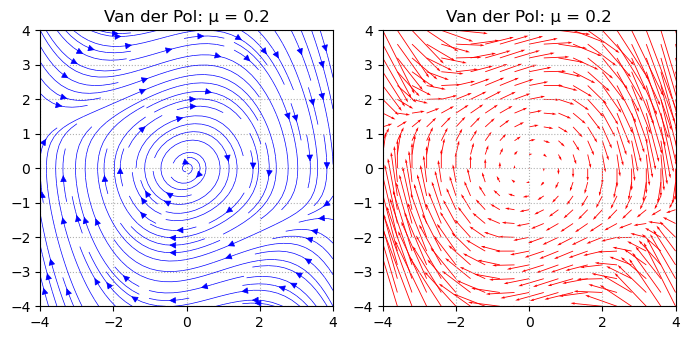

In [8]:
plot_Van_der_Pol(0.2)

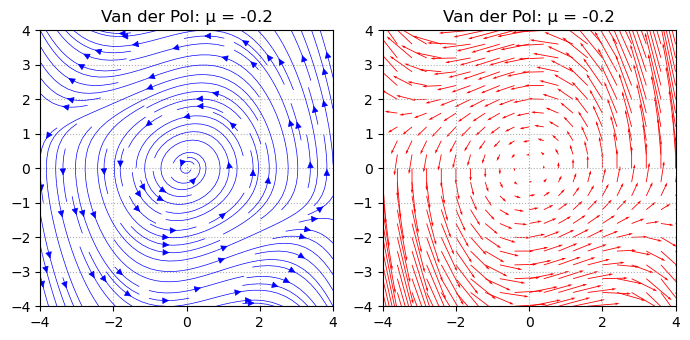

In [9]:
plot_Van_der_Pol(-0.2, sign=-1.0)

**注意:** 上のセルの `sign=-1.0` はプロットするときに縦軸($v$ 軸)の向きを反転してプロットすることを意味している.

## Van der Pol 方程式の数値解

In [10]:
using DifferentialEquations
using Plots
default(:bglegend, plot_color(default(:bg), 0.7))
default(:fglegend, plot_color(ifelse(isdark(plot_color(default(:bg))), :white, :black), 0.6))

gr()
ENV["PLOTS_TEST"] = "true";

In [24]:
### Van der Pol 方程式の記述
function vanderpol!(du, u, p, t)
    # u[1] = x
    # u[2] = v
    # du[1] = dx/dt
    # du[2] = dv/dt
    # p[1] = μ
    
    # dx/dt = v
    du[1] = u[2]
    # dv/dt = μ (1 - x^2) v - x
    du[2] = p[1]*(1 - u[1]^2)*u[2] - u[1]
end

function solve_vanderpol(μ, x0, v0, tmax)
    u0 = [x0, v0] # initial values
    p = [μ] # parameters
    tspan = (0.0, tmax) # time span
    prob = ODEProblem(vanderpol!, u0, tspan, p) # ordinary differential equation problem
    solve(prob)
end

function plot_vanderpol_sol(sol, μ; l1=:best, l2=:best)
    plot(size=(600, 250))
    plot!(sol, label=["x" "v"], legend=l1, lw=1)
    title!("Van der Pol equation (mu = $μ)", titlefontsize=12) |> display
    
    plot(size=(300, 300))
    plot!(sol, vars=(1,2), label="(x,v)", legend=l2, lw=1)
    title!("Van der Pol equation (mu = $μ)", titlefontsize=10) |> display
end

function solve_and_plot_vanderpol(; μ=0.5, x0=0.1, v0=0.0, tmax=50.0, l1=:topleft, l2=:best)
    sol =  solve_vanderpol(μ, x0, v0, tmax)
    plot_vanderpol_sol(sol, μ; l1=l1, l2=l2)
end

solve_and_plot_vanderpol (generic function with 1 method)

### $\mu=0$

$\mu = 0$ の場合に van der Pol 方程式の解は $(x,v)$ 平面上の円運動になる.

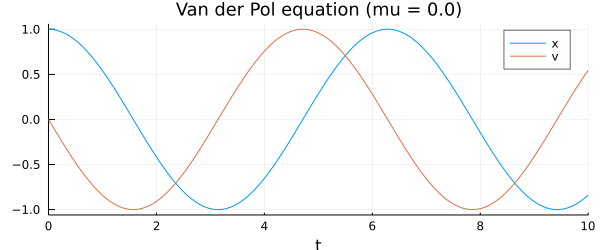

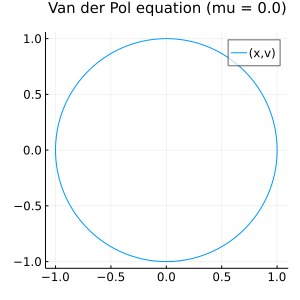

In [25]:
solve_and_plot_vanderpol(; μ=0.0, x0=1.0, v0=0.0, tmax=10.0, l1=:topright)

### $\mu = 0.1$

$\mu = 0.1$ の場合に, van der Pol 方程式の解は $(x,v)$ 平面上の歪んだ円に内側と外側から巻き付くような運動になる. 巻き付く先の歪んだ円は **limit cycle** と呼ばれる.

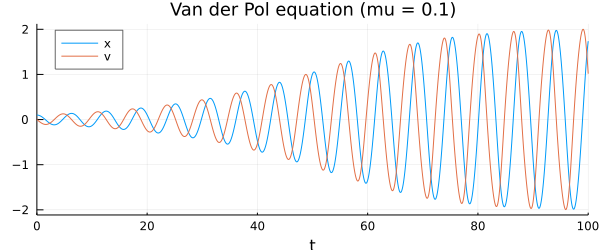

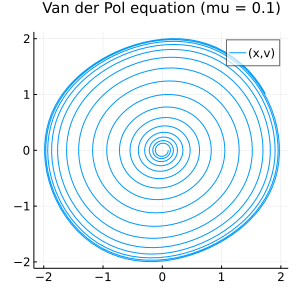

In [27]:
solve_and_plot_vanderpol(; μ=0.1, x0=0.1, v0=0.0, tmax=100.0)

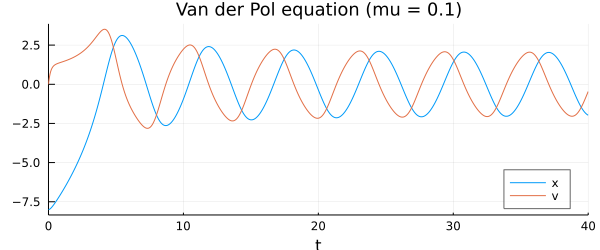

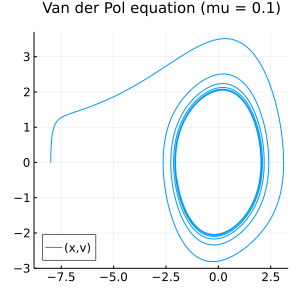

In [28]:
solve_and_plot_vanderpol(; μ=0.1, x0=-8.0, v0=0.0, tmax=40.0, l1=:bottomright, l2=:bottomleft)

### $\mu=0.5$

$\mu$ を大きくすると limit cycle の形が円から離れて行く.

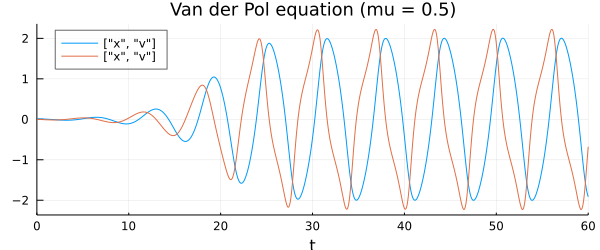

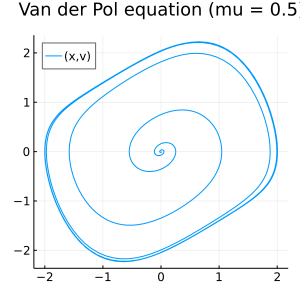

In [15]:
solve_and_plot_vanderpol(; μ=0.5, x0=0.01, v0=0.0, tmax=60.0, l2=:topleft)

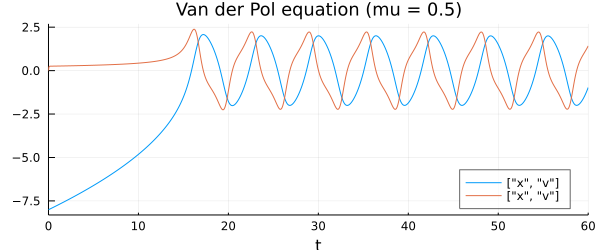

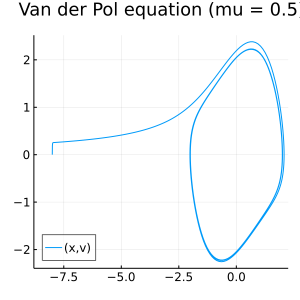

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = (::DefaultLinSolve)(x::Vector{Float64}, A::Matrix{Float64}, b::Vector{Float64}, update_matrix::Bool; reltol::Float64, kwargs::Base.Pairs{Symbol, DiffEqBase.ScaleVector{Vector{Float64}}, Tuple{Symbol, Symbol}, NamedTuple{(:Pl, :Pr), Tuple{DiffEqBase.ScaleVector{Vector{Float64}}, DiffEqBase.ScaleVector{Vector{Float64}}}}}) at linear_nonlinear.jl:91
└ @ DiffEqBase D:\.julia\packages\DiffEqBase\oe7VF\src\linear_nonlinear.jl:91


In [16]:
solve_and_plot_vanderpol(; μ=0.5, x0=-8.0, v0=0.0, tmax=60.0, l1=:bottomright, l2=:bottomleft)

### $\mu=1$

$\mu = 1$ での limit cycle は斜めに傾いた平行四辺形に近い形になる.

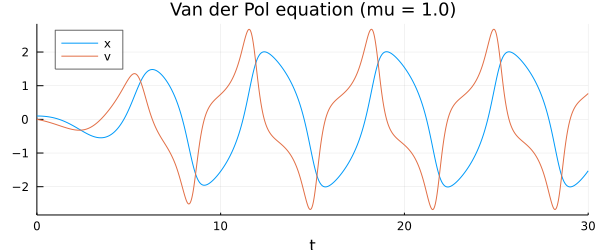

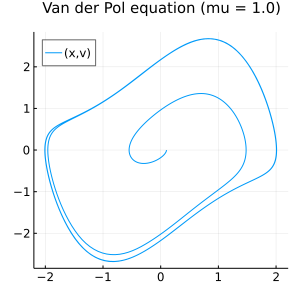

In [29]:
solve_and_plot_vanderpol(; μ=1.0, x0=0.1, v0=0.0, tmax=30.0, l2=:topleft)

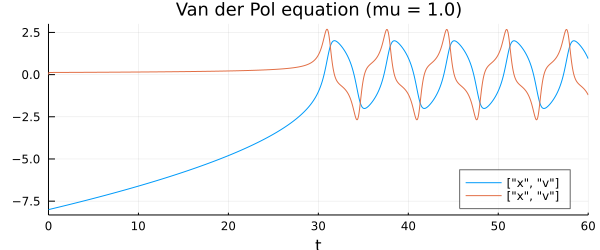

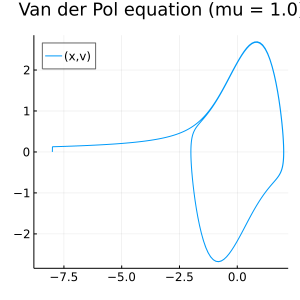

In [18]:
solve_and_plot_vanderpol(; μ=1.0, x0=-8.0, v0=0.0, tmax=60.0, l1=:bottomright, l2=:topleft)

## 正弦波による強制力付きの場合

$$
\begin{cases}
\dot{x} = v, \\
\dot{v} = \mu(1-x^2)v - x + A\sin\omega t.
\end{cases}
$$

In [19]:
using DifferentialEquations
using Plots
default(:bglegend, plot_color(default(:bg), 0.7))
default(:fglegend, plot_color(ifelse(isdark(plot_color(default(:bg))), :white, :black), 0.6))

gr()
ENV["PLOTS_TEST"] = "true";

In [20]:
### sin による強制力付きの Van der Pol 方程式の記述
function vanderpolsin!(du, u, p, t)
    # x = u[1]
    # v = u[2]
    # dx/dt = du[1]
    # dv/dt = du[2]
    # μ = p[1]
    # A = p[2]
    # ω = p[3]
    
    # dx/dt = v
    du[1] = u[2]
    # dv/dt = μ (1 - x^2) v - x + A sin ωt
    du[2] = p[1]*(1 - u[1]^2)*u[2] - u[1] + p[2]*sin(p[3]*t)
end

function solve_vanderpolsin(; μ=1.0, A=1.2, ω=2π/10, x0=0.1, v0=0.0, tmax=100)
    u0 = [x0, v0] # initial values
    p = [μ, A, ω] # parameters
    tspan = (0.0, tmax) # time span
    prob = ODEProblem(vanderpolsin!, u0, tspan, p) # ordinary differential equation problem
    solve(prob)
end

function plot_vanderpol_sol(sol, μ, A, ω; l1=:best, l2=:best)
    plot(size=(600, 200))
    plot!(sol, vars=(0,1), label="x", legend=l1, lw=1)
    title!("Forced Van der Pol (mu = $μ, A = $A, omega = $(round(ω, digits=2)))", titlefontsize=10) |> display
    
    sleep(0.1)
    plot(size=(300, 300))
    plot!(sol, vars=(1,2), label="(x,v)", legend=l2, lw=1)
    title!("mu = $μ, A = $A, omega = $(round(ω, digits=2))", titlefontsize=10) |> display
end

function solve_and_plot_vanderpolsin(; μ=1.0, A=1.2, ω=2π/5, x0=0.1, v0=0.0, tmax=50.0, l1=false, l2=false)
    sol =  solve_vanderpolsin(μ=μ, A=A, ω=ω, x0=x0, v0=v0, tmax=tmax)
    plot_vanderpol_sol(sol, μ, A, ω; l1=l1, l2=l2)
end

solve_and_plot_vanderpolsin (generic function with 1 method)

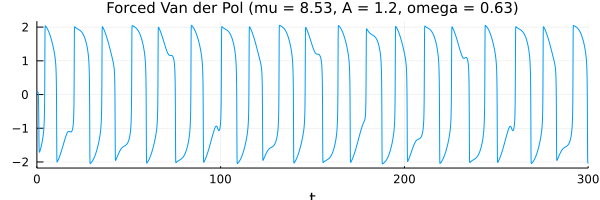

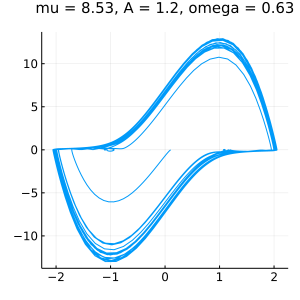

In [30]:
solve_and_plot_vanderpolsin(; μ=8.53, A=1.2, ω=2π/10, x0=0.1, v0=0.0, tmax=300.0)

カオス的な動き方をしている.